## Prep

In [4]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
from time import time

In [5]:
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

## Stuff that shouldn't change

In [6]:
NUM_EPOCHS = 15
LEARNING_RATE = 0.03
BATCH_SIZE = 64
input_size = 784
output_size = 10

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])

In [7]:
trainset = dsets.MNIST(root='./../data', 
                            train=True, 
                            download=True, 
                            transform=transform)
valset = dsets.MNIST(root='./../data', 
                            train=False, 
                            download=True, 
                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True)
valloader = torch.utils.data.DataLoader(valset, 
                                        batch_size=BATCH_SIZE,
                                        shuffle=True)

In [8]:
def train(model,criterion,optimizer, epochs = NUM_EPOCHS):
    time0 = time()
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            i += 1
            # Flatten MNIST images into a 784 long vector
            images = images.view(-1, 28 * 28)

            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            running_loss += loss.item()
        correct = 0
        for x, y in valloader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(valset))
        useful_stuff['validation_accuracy'].append(accuracy)
        print("Epoch",epoch, 'loss',running_loss/len(trainloader))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)
    return useful_stuff
    

 ## Model0: Same as Medium but using cross entropy loss

In [9]:
torch.manual_seed(2)
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model0 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size))
print(model0)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(), lr=LEARNING_RATE)

In [11]:
training_results0 = train(model0,criterion,optimizer)

Epoch 0 loss 0.6152851757829758
Epoch 1 loss 0.28050671672738436
Epoch 2 loss 0.22051556379810325
Epoch 3 loss 0.17863017826208047
Epoch 4 loss 0.15034375437445988
Epoch 5 loss 0.1298730339157953
Epoch 6 loss 0.11485090964575058
Epoch 7 loss 0.10233959092744696
Epoch 8 loss 0.0909270547133789
Epoch 9 loss 0.08300806058427768
Epoch 10 loss 0.07542853560924197
Epoch 11 loss 0.06930908959196098
Epoch 12 loss 0.0637751703680769
Epoch 13 loss 0.058010063208103466
Epoch 14 loss 0.05408146082627664

Training Time (in minutes) = 2.5703366001447043


In [12]:
### dont really need this lol
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():# nograd cuz dont need to backprop and its faster
        ps = model0(img)

    #print(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9679


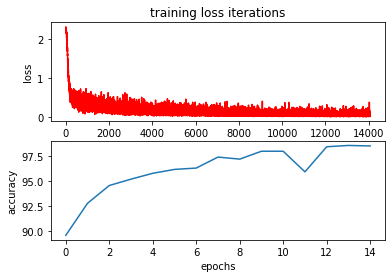

98.50333333333333

In [39]:
plot_accuracy_loss(training_results0)
acc = training_results0['validation_accuracy']
acc.pop()

## Model1

In [40]:
hlayer1 = np.arange(start = 128,stop = 16,step = -24)
hlayer2 = np.arange(start = 64, stop = 8, step = -12)
print(hlayer1)
print(hlayer2)

[128 104  80  56  32]
[64 52 40 28 16]


In [41]:
class Model1(nn.Module):
    def __init__(self,ind, h1d, h2d, outd):
        super(Model1, self).__init__()
        self.lin1 = nn.Linear(ind,h1d)
        self.lin2 = nn.Linear(h1d,h2d)
        self.lin3 = nn.Linear(h2d, outd)
    def forward(self,x):
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = self.lin3(x)
        return x
        

In [42]:
criterion = nn.CrossEntropyLoss()


Model  0 with  128 64  layers
Epoch 0 loss 0.6317866000809522
Epoch 1 loss 0.2900057767770057
Epoch 2 loss 0.2253049629440567
Epoch 3 loss 0.18034803508711394
Epoch 4 loss 0.14950237010540104
Epoch 5 loss 0.1271036061019436
Epoch 6 loss 0.11198479774147907
Epoch 7 loss 0.09946862890470479
Epoch 8 loss 0.08904324242892836
Epoch 9 loss 0.08168542786721768

Training Time (in minutes) = 2.5739124337832133


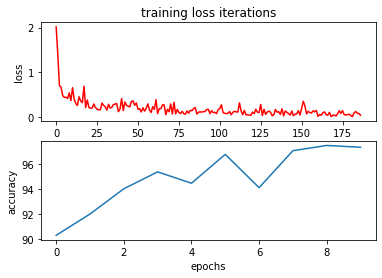

Model  1 with  104 52  layers
Epoch 0 loss 0.630056800157912
Epoch 1 loss 0.28942686542550894
Epoch 2 loss 0.22290781631605075
Epoch 3 loss 0.17939546191965594
Epoch 4 loss 0.14947279747813813
Epoch 5 loss 0.1294055247484748
Epoch 6 loss 0.11416310254436757
Epoch 7 loss 0.10213532784520817
Epoch 8 loss 0.09243895697977338
Epoch 9 loss 0.08408704864631679

Training Time (in minutes) = 2.5802956660588583


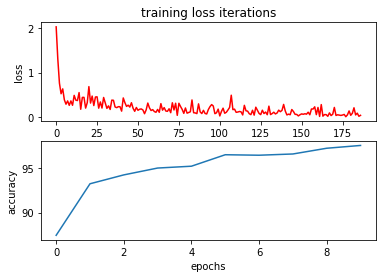

Model  2 with  80 40  layers
Epoch 0 loss 0.6247234788975482
Epoch 1 loss 0.28854738927281487
Epoch 2 loss 0.22734293770164188
Epoch 3 loss 0.1905473279677379
Epoch 4 loss 0.16239216230285447
Epoch 5 loss 0.13903595248400086
Epoch 6 loss 0.12475694531102234
Epoch 7 loss 0.11029841070041568
Epoch 8 loss 0.10048711143219585
Epoch 9 loss 0.09190306039566774

Training Time (in minutes) = 2.5003946860631308


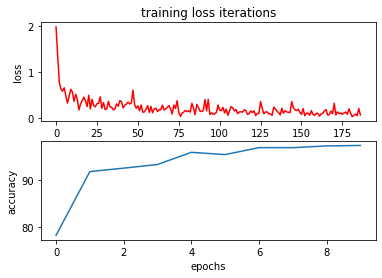

Model  3 with  56 28  layers
Epoch 0 loss 0.6462405223899813
Epoch 1 loss 0.3017853979251659
Epoch 2 loss 0.2419107972956034
Epoch 3 loss 0.20017841521467863
Epoch 4 loss 0.17292304515147577
Epoch 5 loss 0.15271471852738497
Epoch 6 loss 0.1368332030053046
Epoch 7 loss 0.12418809693568805
Epoch 8 loss 0.11435348774864475
Epoch 9 loss 0.1045591163067723

Training Time (in minutes) = 2.4954198638598126


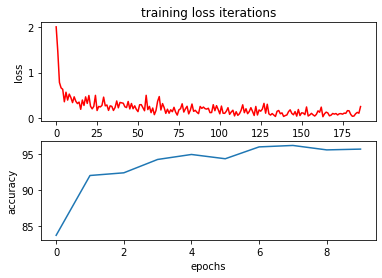

Model  4 with  32 16  layers
Epoch 0 loss 0.68569270494396
Epoch 1 loss 0.3198510120545369
Epoch 2 loss 0.2549183439376003
Epoch 3 loss 0.21494707478277847
Epoch 4 loss 0.18693160040101517
Epoch 5 loss 0.16632621359826724
Epoch 6 loss 0.15202815221078486
Epoch 7 loss 0.1395536831993141
Epoch 8 loss 0.12968355884898636
Epoch 9 loss 0.12274030882960507

Training Time (in minutes) = 2.469148286183675


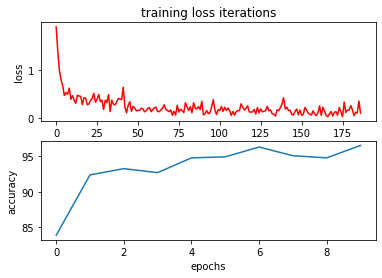

In [43]:
accuracy = []
modelnum = 0
for i,j in zip(hlayer1, hlayer2):
    print("Model ",modelnum, "with ", i ,j ," layers")
    modelnum += 1
    model1 = Model1(input_size, i, j, output_size)
    optimizer = torch.optim.SGD(model1.parameters(), lr=LEARNING_RATE)
    training_results1 = train(model1,criterion, optimizer, epochs = 10)
    #results.append(training_results)
    plot_accuracy_loss(training_results1)
    accuracy.append(training_results0['validation_accuracy'].pop())
     

In [44]:
accuracy

[98.55166666666668, 98.42166666666667, 95.93, 97.975, 97.97833333333334]

## Model2- Adam optimizer

In [46]:
model2 = Model1(input_size,128,64,10)
optimizer = torch.optim.Adam(model2.parameters(), lr=LEARNING_RATE)
training_results2 = train(model2,criterion,optimizer)

Epoch 0 loss 0.6098271728292711
Epoch 1 loss 0.4306505933594602
Epoch 2 loss 0.43434946976109606
Epoch 3 loss 0.44173367945814945
Epoch 4 loss 0.43481146985851626
Epoch 5 loss 0.4335637753054913
Epoch 6 loss 0.525719007512908
Epoch 7 loss 0.4880212894174209
Epoch 8 loss 0.519177468759673
Epoch 9 loss 0.5054160771148799
Epoch 10 loss 0.4769822434305763
Epoch 11 loss 0.5194677537215798
Epoch 12 loss 0.5233469551274263
Epoch 13 loss 0.510540218011085
Epoch 14 loss 0.5398721798285365

Training Time (in minutes) = 4.308158449331919


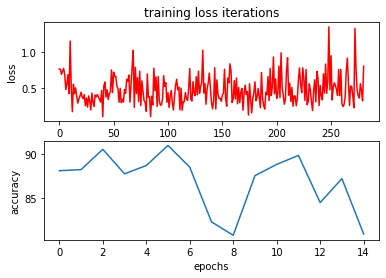

In [47]:
plot_accuracy_loss(training_results2)

didnt work very well. idk what adam does

## Model3 - one hidden layer

In [56]:
class Model3(nn.Module):
    def __init__(self,ind, h1d, outd):
        super(Model3, self).__init__()
        self.lin1 = nn.Linear(ind,h1d)
        self.lin2 = nn.Linear(h1d, outd)
    def forward(self,x):
        x = torch.relu(self.lin1(x))
        x = self.lin2(x)
        return x


In [57]:
layern = [256,128,64,32]

Model  0 with  256  layers
Epoch 0 loss 0.49094638401574925
Epoch 1 loss 0.28067298345506064
Epoch 2 loss 0.22277209414903926
Epoch 3 loss 0.18310333019507719
Epoch 4 loss 0.15568690303006152
Epoch 5 loss 0.13630177721039635
Epoch 6 loss 0.12028217210825573
Epoch 7 loss 0.10874088467168275
Epoch 8 loss 0.09850561657626587
Epoch 9 loss 0.09037925083754159

Training Time (in minutes) = 2.9374809145927427


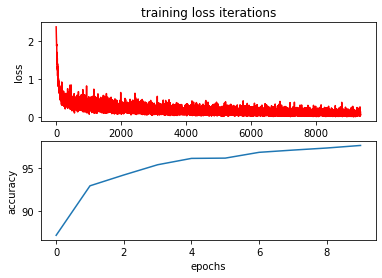

Model  1 with  128  layers
Epoch 0 loss 0.5046393546992655
Epoch 1 loss 0.27896539369689377
Epoch 2 loss 0.22190345446867094
Epoch 3 loss 0.1850065839355752
Epoch 4 loss 0.15940937879822972
Epoch 5 loss 0.14020596051227247
Epoch 6 loss 0.1254224746720369
Epoch 7 loss 0.11317761490411406
Epoch 8 loss 0.10363860533181538
Epoch 9 loss 0.0951847146773564

Training Time (in minutes) = 2.838511844476064


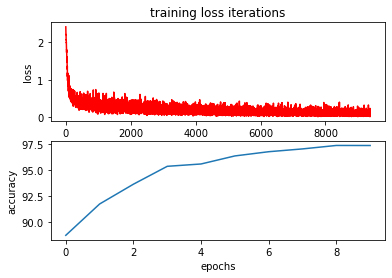

Model  2 with  64  layers
Epoch 0 loss 0.5149935396161797
Epoch 1 loss 0.30067533560430826
Epoch 2 loss 0.24726582625543259
Epoch 3 loss 0.2060637960055553
Epoch 4 loss 0.1767862416835609
Epoch 5 loss 0.1549567334961567
Epoch 6 loss 0.13854581541391706
Epoch 7 loss 0.126450586376954
Epoch 8 loss 0.1158981735208459
Epoch 9 loss 0.10774496183601587

Training Time (in minutes) = 2.672701831658681


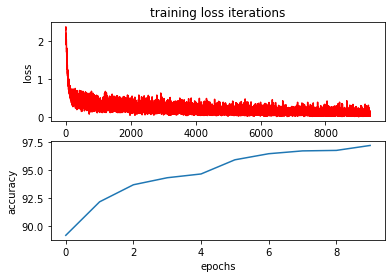

Model  3 with  32  layers
Epoch 0 loss 0.5195107268991628
Epoch 1 loss 0.31150991692027047
Epoch 2 loss 0.2714429931766761
Epoch 3 loss 0.24021565835915012
Epoch 4 loss 0.21342937884204932
Epoch 5 loss 0.19238630349019062
Epoch 6 loss 0.175241069592186
Epoch 7 loss 0.16217383060223067
Epoch 8 loss 0.15128560506625535
Epoch 9 loss 0.14252492222887303

Training Time (in minutes) = 2.528751718997955


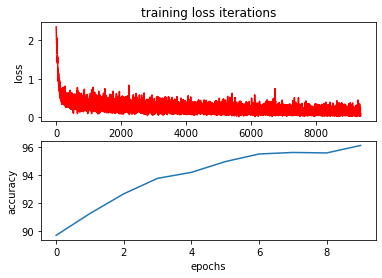

In [61]:
modelnum = 0
accuracy1 = []
for i in layern:
    print("Model ",modelnum, "with ", i ," layers")
    modelnum += 1
    model3 = Model3(input_size, i, output_size)
    optimizer = torch.optim.SGD(model3.parameters(), lr=LEARNING_RATE)
    training_results1 = train(model3,criterion, optimizer, epochs = 10)
    #results.append(training_results)
    plot_accuracy_loss(training_results1)
    accuracy1.append(training_results0['validation_accuracy'].pop())

In [62]:
accuracy1

[96.30333333333333, 96.17, 95.78333333333333, 95.20333333333333]